In [84]:
# Jimmy 5.29
"""
Work FLow
1. Decriptive Statistics
2. Data Processing & Feature Engineering
3. Data Analysis & Visualization
"""

import os 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
import squarify

# load data
data = pd.read_csv('pokemon.csv')
pd.set_option('display.max_rows', data.shape[0])
pd.set_option('display.max_columns', data.shape[1])
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


# 1. Descriptive Statistics & Data Cleaning

• name: The English name of the Pokemon  
• japanese_name: The Original Japanese name of the Pokemon  
• pokedex_number: The entry number of the Pokemon in the National Pokedex  
• percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.  
• type1: The Primary Type of the Pokemon  
• type2: The Secondary Type of the Pokemon  
• classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex  
• height_m: Height of the Pokemon in metres  
• weight_kg: The Weight of the Pokemon in kilograms  
• capture_rate: Capture Rate of the Pokemon  
• base_egg_steps: The number of steps required to hatch an egg of the Pokemon  
• abilities: A stringified list of abilities that the Pokemon is capable of having  
• experience_growth: The Experience Growth of the Pokemon  
• base_happiness: Base Happiness of the Pokemon  
• against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type  
• hp: The Base HP of the Pokemon  
• attack: The Base Attack of the Pokemon  
• defense: The Base Defense of the Pokemon  
• sp_attack: The Base Special Attack of the Pokemon  
• sp_defense: The Base Special Defense of the Pokemon  
• speed: The Base Speed of the Pokemon  
• generation: The numbered generation which the Pokemon was first introduced  
• is_legendary: Denotes if the Pokemon is legendary.  

In [85]:
# pokemon dataset has 801 rows and 41 columns
data.shape

(801, 41)

In [86]:
# random sample 5 rows for more detail infomatoin and we can better understand the data
data.sample(5).T

,396,61,497,322,174
abilities,"['Intimidate', 'Reckless']","['Water Absorb', 'Damp', 'Swift Swim']","['Blaze', 'Thick Fat']","['Magma Armor', 'Solid Rock', 'Anger Point']","['Hustle', 'Serene Grace', 'Super Luck']"
against_bug,0.5,0.5,0.5,0.5,0.5
against_dark,1.0,0.5,1.0,1.0,0.5
against_dragon,1.0,1.0,1.0,1.0,0.0
against_electric,2.0,2.0,1.0,0.0,1.0
against_fairy,1.0,2.0,0.5,0.5,1.0
against_fight,1.0,1.0,1.0,1.0,0.5
against_fire,1.0,0.5,0.5,0.5,1.0
against_flying,1.0,2.0,1.0,1.0,1.0
against_ghost,0.0,1.0,1.0,1.0,1.0


From the random sample of data and from the last 5 rows of the dataset that we extracted, we can see that there are some NaN values in columns "type2". And also that we got float type, integer type, and string type values in our dataset.

In [87]:
# check for Null or NaN values in the dataset
data.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [88]:
# Replace the NaN values for easier analysis
data['type2'].fillna('None', inplace=True) # Replacing the values in type2 with None
data['percentage_male'].fillna('None', inplace=True) # Replacing the values in percentage_male with None
data['height_m'].fillna(data['height_m'].mean(), inplace=True) # Replacing the values in height_m with Mode value of the whole column
data['weight_kg'].fillna(data['weight_kg'].mean(), inplace=True) # Replacing the values in weight_kg with mode value of the whole column

In [89]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
against_bug,801.0,9.962547e-01,0.597248,0.25,0.5,1.0,1.0,4.0
against_dark,801.0,1.057116e+00,0.438142,0.25,1.0,1.0,1.0,4.0
against_dragon,801.0,9.687890e-01,0.353058,0.00,1.0,1.0,1.0,2.0
against_electric,801.0,1.073970e+00,0.654962,0.00,0.5,1.0,1.0,4.0
against_fairy,801.0,1.068976e+00,0.522167,0.25,1.0,1.0,1.0,4.0
against_fight,801.0,1.065543e+00,0.717251,0.00,0.5,1.0,1.0,4.0
against_fire,801.0,1.135456e+00,0.691853,0.25,0.5,1.0,2.0,4.0
against_flying,801.0,1.192884e+00,0.604488,0.25,1.0,1.0,1.0,4.0
against_ghost,801.0,9.850187e-01,0.558256,0.00,1.0,1.0,1.0,4.0
against_grass,801.0,1.034020e+00,0.788896,0.25,0.5,1.0,1.0,4.0


In [90]:
# check how many unique elements they contain
for i in ['generation','type1','type2']:
    print("{} contains: {}".format(i,data[i].unique()))

generation contains: [1 2 3 4 5 6 7]
type1 contains: ['grass' 'fire' 'water' 'bug' 'normal' 'poison' 'electric' 'ground'
 'fairy' 'fighting' 'psychic' 'rock' 'ghost' 'ice' 'dragon' 'dark' 'steel'
 'flying']
type2 contains: ['poison' 'None' 'flying' 'dark' 'electric' 'ice' 'ground' 'fairy' 'grass'
 'fighting' 'psychic' 'steel' 'fire' 'rock' 'water' 'dragon' 'ghost' 'bug'
 'normal']


In [91]:
# move the name to the first column for  easier identify the pokemon
data.insert(0, 'name', data.pop('name'))
data.isnull().sum()

name                 0
abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   abilities          801 non-null    object 
 2   against_bug        801 non-null    float64
 3   against_dark       801 non-null    float64
 4   against_dragon     801 non-null    float64
 5   against_electric   801 non-null    float64
 6   against_fairy      801 non-null    float64
 7   against_fight      801 non-null    float64
 8   against_fire       801 non-null    float64
 9   against_flying     801 non-null    float64
 10  against_ghost      801 non-null    float64
 11  against_grass      801 non-null    float64
 12  against_ground     801 non-null    float64
 13  against_ice        801 non-null    float64
 14  against_normal     801 non-null    float64
 15  against_poison     801 non-null    float64
 16  against_psychic    801 non

One problem that can be identified in data.info() was that it has 7 object type columns, but on checking the data we can see that all the values we get from the functions data.sample(), head() and tail() is that, the column "capture_rate" has all numeric values but still it is counted in object type.

In [93]:
for i in data.capture_rate:
    print(i,end=", ")

45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 120, 45, 255, 120, 45, 255, 120, 45, 255, 127, 255, 90, 255, 90, 190, 75, 255, 90, 235, 120, 45, 235, 120, 45, 150, 25, 190, 75, 170, 50, 255, 90, 255, 120, 45, 190, 75, 190, 75, 255, 50, 255, 90, 190, 75, 190, 75, 190, 75, 255, 120, 45, 200, 100, 50, 180, 90, 45, 255, 120, 45, 190, 60, 255, 120, 45, 190, 60, 190, 75, 190, 60, 45, 190, 45, 190, 75, 190, 75, 190, 60, 190, 90, 45, 45, 190, 75, 225, 60, 190, 60, 90, 45, 190, 75, 45, 45, 45, 190, 60, 120, 60, 30, 45, 45, 225, 75, 225, 60, 225, 60, 45, 45, 45, 45, 45, 45, 45, 255, 45, 45, 35, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 25, 3, 3, 3, 45, 45, 45, 3, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 255, 90, 255, 90, 255, 90, 255, 90, 90, 190, 75, 190, 150, 170, 190, 75, 190, 75, 235, 120, 45, 45, 190, 75, 65, 45, 255, 120, 45, 45, 235, 120, 75, 255, 90, 45, 45, 30, 70, 45, 225, 45, 60, 190, 75, 190, 60, 25, 190, 75, 45, 25, 190, 45, 60, 120, 60, 190, 75, 225, 75, 60, 190, 75, 45, 25, 25, 120, 45, 45,

The value of one particular Pokemon has 2 capture rates (i.e. 30 (Meteorite) 255 (Core)). We will replace it with one single value and then we are good to convert this column into integer type.

In [94]:
data[data["capture_rate"]== "30 (Meteorite)255 (Core)"][['name','capture_rate','type1','generation','classfication']]

,name,capture_rate,type1,generation,classfication
773,Minior,30 (Meteorite)255 (Core),rock,7,Meteor Pokémon


In [95]:
data["capture_rate"].replace({'30 (Meteorite)255 (Core)': '30'}, inplace=True)
data['capture_rate'] = data['capture_rate'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   abilities          801 non-null    object 
 2   against_bug        801 non-null    float64
 3   against_dark       801 non-null    float64
 4   against_dragon     801 non-null    float64
 5   against_electric   801 non-null    float64
 6   against_fairy      801 non-null    float64
 7   against_fight      801 non-null    float64
 8   against_fire       801 non-null    float64
 9   against_flying     801 non-null    float64
 10  against_ghost      801 non-null    float64
 11  against_grass      801 non-null    float64
 12  against_ground     801 non-null    float64
 13  against_ice        801 non-null    float64
 14  against_normal     801 non-null    float64
 15  against_poison     801 non-null    float64
 16  against_psychic    801 non

Then we will remove some unneeded colunms and add few some needed

In [96]:
# Removing japanese_name, pokedex_number, and percentage_male
data.drop(columns=['japanese_name', 'pokedex_number', 'percentage_male'], axis=1, inplace=True)

# adding total abilities that a pokemon has
data['total_abilities'] = data.apply(lambda x: len(x["abilities"]), axis=1)

In [97]:
# merging type1 and type2 into one column => type
# renaming type1 => primary_type, type2 => secondary_type
data['type'] = data.apply(lambda x: x['type1'] if x['type2'] == 'None' else f'{x["type1"]}_{x["type2"]}', axis=1)

data.rename(columns={"type1": "primary_type", "type2": "secondary_type"}, inplace=True)

data.sample(5).T

,770,416,195,613,276
name,Pyukumuku,Pachirisu,Espeon,Beartic,Swellow
abilities,"['Innards Out', 'Unaware']","['Run Away', 'Pickup', 'Volt Absorb']","['Synchronize', 'Magic Bounce']","['Snow Cloak', 'Slush Rush', 'Swift Swim']","['Guts', 'Scrappy']"
against_bug,1.0,1.0,2.0,1.0,0.5
against_dark,1.0,1.0,2.0,1.0,1.0
against_dragon,1.0,1.0,1.0,1.0,1.0
against_electric,2.0,0.5,1.0,1.0,2.0
against_fairy,1.0,1.0,1.0,1.0,1.0
against_fight,1.0,1.0,0.5,2.0,1.0
against_fire,0.5,1.0,1.0,2.0,1.0
against_flying,1.0,0.5,1.0,1.0,1.0


# 2. Data Analysis & Visualization

(1) Correlation between each attributes

In [98]:
data.corr()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,total_abilities
against_bug,1.000000,0.230107,0.165430,-0.246943,0.239566,0.137902,0.202778,0.183343,0.129174,0.079197,-0.186841,0.148176,0.215589,0.354255,-0.463272,-0.210522,0.055504,-0.254732,-0.054175,0.062133,0.009994,-0.012398,0.005230,-0.036474,0.035717,-0.059781,0.034897,0.055352,-0.002342,-0.043802,-0.031344,-0.001549,0.027864,-0.009296
against_dark,0.230107,1.000000,0.140830,-0.015830,-0.301354,-0.357981,0.010527,-0.179697,0.672337,-0.006533,-0.007660,-0.010763,-0.413632,-0.236919,-0.230415,0.011963,-0.119758,-0.001976,-0.098849,0.187220,0.024155,0.065446,-0.047674,0.048039,-0.008391,0.018608,0.010589,0.170849,0.132507,-0.000326,0.037634,-0.016013,0.136315,-0.133164
against_dragon,0.165430,0.140830,1.000000,-0.108928,0.439705,0.035237,-0.261570,0.064850,-0.049941,-0.037135,-0.120042,0.350048,0.142035,-0.210199,0.100153,0.090184,-0.227697,-0.096549,0.138217,0.164773,-0.151915,0.069766,-0.091317,-0.023794,0.172547,0.164448,0.089721,0.039739,-0.047416,0.078123,0.125991,-0.025201,0.014844,-0.065178
against_electric,-0.246943,-0.015830,-0.108928,1.000000,-0.089864,-0.102798,-0.279029,-0.111461,-0.073031,0.056209,-0.269444,-0.328531,0.076699,-0.015769,-0.017592,0.417261,-0.187543,-0.297600,-0.104276,-0.061970,0.030411,-0.017137,-0.006815,-0.072433,-0.041584,0.003022,-0.035354,0.022305,0.019193,0.111422,-0.101403,-0.063180,-0.023151,-0.009941
against_fairy,0.239566,-0.301354,0.439705,-0.089864,1.000000,0.157712,-0.169489,0.199862,-0.120806,0.052899,-0.256504,0.273650,0.149488,0.146464,-0.145238,-0.205444,0.130323,-0.218937,0.207526,0.120594,-0.209323,0.098948,-0.091230,0.001655,0.146370,0.114993,0.129284,-0.010296,0.002754,0.065401,0.098210,0.150801,0.050165,-0.026883
against_fight,0.137902,-0.357981,0.035237,-0.102798,0.157712,1.000000,-0.076480,-0.318941,-0.546982,0.269157,0.358793,-0.220239,-0.006997,-0.189798,-0.264938,-0.240964,0.165066,0.205249,0.149123,-0.006359,-0.088722,0.048629,-0.040466,0.150424,0.010407,0.058524,0.109425,-0.118481,-0.044460,-0.050495,0.159761,0.000681,-0.059132,0.112843
against_fire,0.202778,0.010527,-0.261570,-0.279029,-0.169489,-0.076480,1.000000,0.528127,0.050570,-0.463634,-0.260766,0.186361,-0.055106,0.184334,-0.018519,0.120747,0.115992,-0.242635,-0.005762,-0.044802,0.007441,-0.061698,0.078668,0.037921,-0.027136,-0.085422,-0.099242,-0.088578,-0.019520,-0.079129,-0.043925,0.061157,-0.011073,-0.037781
against_flying,0.183343,-0.179697,0.064850,-0.111461,0.199862,-0.318941,0.528127,1.000000,0.013204,-0.358467,-0.465010,0.277935,0.266780,0.484843,0.375023,0.161885,0.001264,-0.311997,-0.002991,-0.091304,0.056480,-0.106586,0.076299,-0.127950,0.019100,-0.072533,-0.060624,-0.111243,-0.079022,-0.043381,-0.125959,0.058204,-0.062214,-0.014460
against_ghost,0.129174,0.672337,-0.049941,-0.073031,-0.120806,-0.546982,0.050570,0.013204,1.000000,0.029542,0.093727,-0.052531,-0.404780,-0.105137,-0.084496,-0.061013,-0.002008,0.009046,-0.034549,0.174115,-0.037205,0.114179,-0.112219,0.136490,0.059262,0.031626,-0.062052,0.233309,0.195439,-0.029007,0.046506,0.038027,0.170746,-0.153541
against_grass,0.079197,-0.006533,-0.037135,0.056209,0.052899,0.269157,-0.463634,-0.358467,0.029542,1.000000,0.195064,-0.239682,-0.127550,-0.221946,-0.093657,-0.375177,0.082812,0.229968,0.036787,-0.064971,0.063475,-0.017340,0.000511,0.139542,-0.039623,0.029533,0.056886,-0.093899,-0.056427,-0.153618,0.048407,-0.107987,-0.070826,0.163818


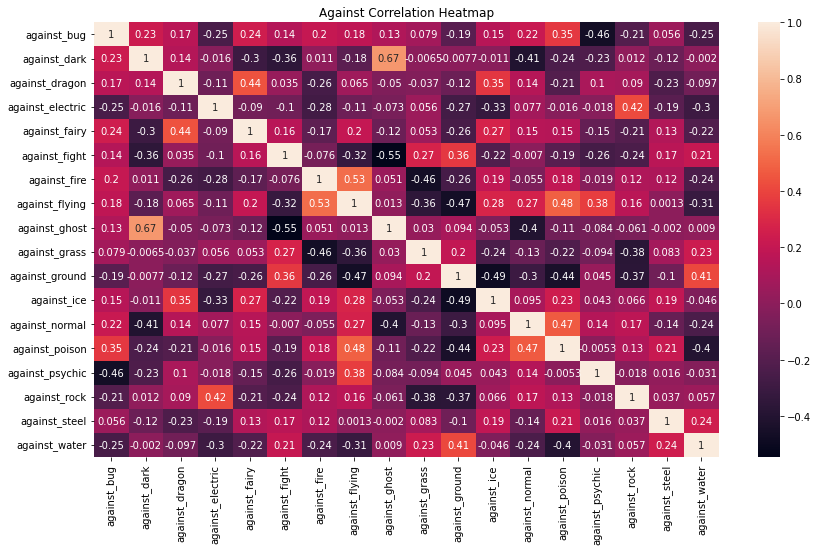

In [99]:
against = []
rest = []

for i in data.columns:
    if 'against' in i:
        against.append(i)
    else:
        rest.append(i)

fig,axes = plt.subplots(figsize=(14,8))
sns.heatmap(data[against].corr(),annot=True).set_title('Against Correlation Heatmap')
plt.show()

We can see that only against_dark has high correlation with against_ghost relatively(i.e. 0.67)

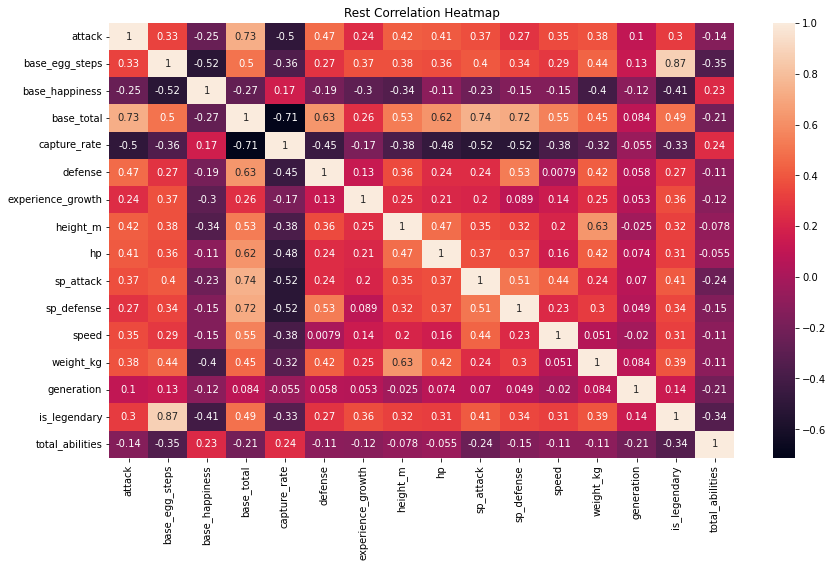

In [100]:
fig,axes = plt.subplots(figsize=(14,8))
sns.heatmap(data[rest].corr(),annot=True).set_title('Rest Correlation Heatmap')
plt.show()

We can see that:
base_total has a good correlation with attack and defense attributes.

base_total with:  
     attack: 0.73  
     sp.attack: 0.74  
     defense: 0.63  
     sp.defense: 0.72  

• a pokemon being legendary has a good correlation with pokemon's egg steps: 0.87  
• The weight of a pokemon has a good correlation with pokemon's height: 0.63

(2) How speed of pokemon releates to various base factors.

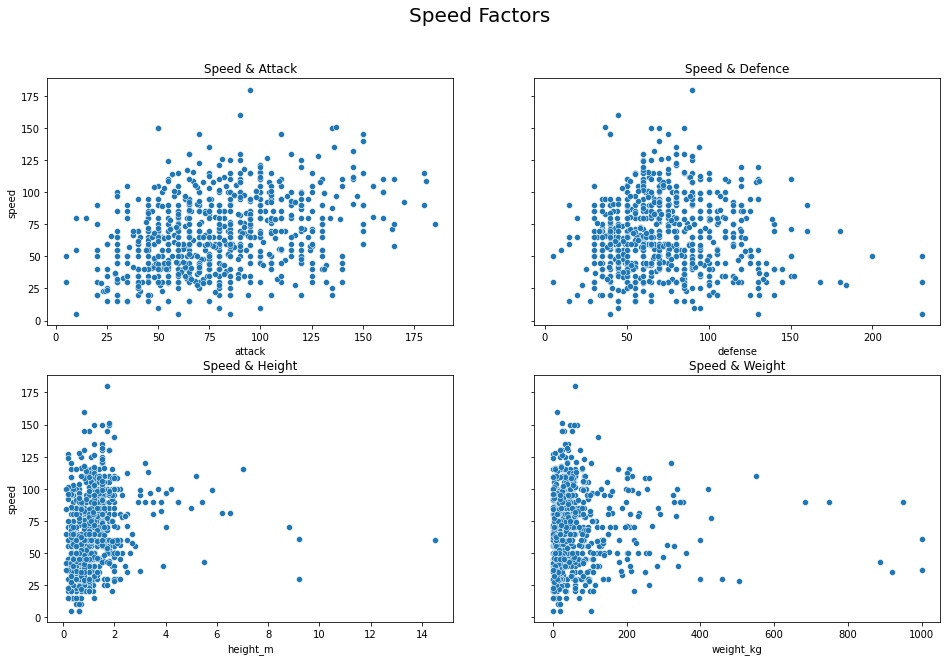

In [101]:
fig,axes = plt.subplots(2,2,figsize=(16,10),sharey=True)
sns.scatterplot(x=data['attack'], y=data['speed'], ax=axes[0,0])
axes[0,0].set_title("Speed & Attack")
sns.scatterplot(x=data['defense'], y=data['speed'],ax=axes[0,1])
axes[0,1].set_title("Speed & Defence")
sns.scatterplot(x=data['height_m'], y=data['speed'],ax=axes[1,0])
axes[1,0].set_title("Speed & Height")
sns.scatterplot(x=data['weight_kg'], y=data['speed'],ax=axes[1,1])
axes[1,1].set_title("Speed & Weight")
fig.suptitle("Speed Factors", size=20)
plt.show()

Some insights that we can get from these graphs are:

(1)A pokemon's speed  slightly depends on its attack and defense capacity, for example some pokemons have high attack while still keep moderate speed and pokemons have highest defense but not very slow.  
(2)Speed and weight affects speed a lot from above plots.  

(2) What is the count of pokemons per generation?

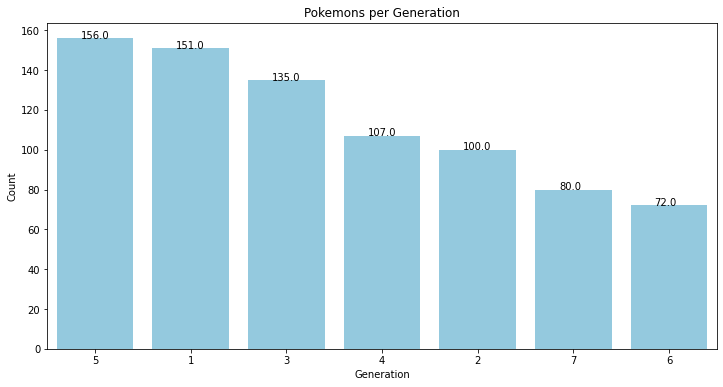

In [102]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x='generation',data=data,order=data['generation'].value_counts().index,color='skyblue')
ax.set_title('Pokemons per Generation')
ax.set(xlabel='Generation',ylabel='Count')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

From above count plot we can figure out that most of the pokemons are from Gen-5, and least in Gen-6. Also, we can see that odd Generations have a larger number of pokemons than even number of generations.

(3) How many types of pokemon are there in each generation?

In [103]:
primary_type_generation_group = data.groupby(['generation', 'primary_type'])['name'].count().to_frame().reset_index()
primary_type_generation_group.rename(columns={'name' : 'type_count'}, inplace=True)
primary_type_generation_group.head(114).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,...,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113
generation,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,...,6,6,6,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
primary_type,bug,dragon,electric,fairy,fighting,fire,ghost,grass,ground,ice,normal,poison,psychic,rock,water,bug,dark,electric,fairy,fighting,...,psychic,rock,steel,water,bug,dark,dragon,electric,fairy,fighting,fire,ghost,grass,ground,normal,poison,psychic,rock,steel,water
type_count,12,3,9,2,7,12,3,12,8,2,22,14,8,9,28,10,5,6,5,2,...,3,8,4,5,9,1,3,3,1,3,5,4,12,2,12,4,6,4,2,9


In [104]:
primary_type_generation_dict  = {}
for generation in list(primary_type_generation_group['generation'].unique()):
    current_generation = []
    for p_type in primary_type_generation_group['primary_type'].unique():
        try:
            current_generation.append(
                primary_type_generation_group.loc[(primary_type_generation_group['generation']==generation) 
                                        & (primary_type_generation_group['primary_type'] == p_type)]['type_count'].values[0])
        except IndexError:
            current_generation.append(0)
    primary_type_generation_dict[f'generation {generation}'] = current_generation

p_type_by_generation = pd.DataFrame(primary_type_generation_dict, index= primary_type_generation_group['primary_type'].unique())

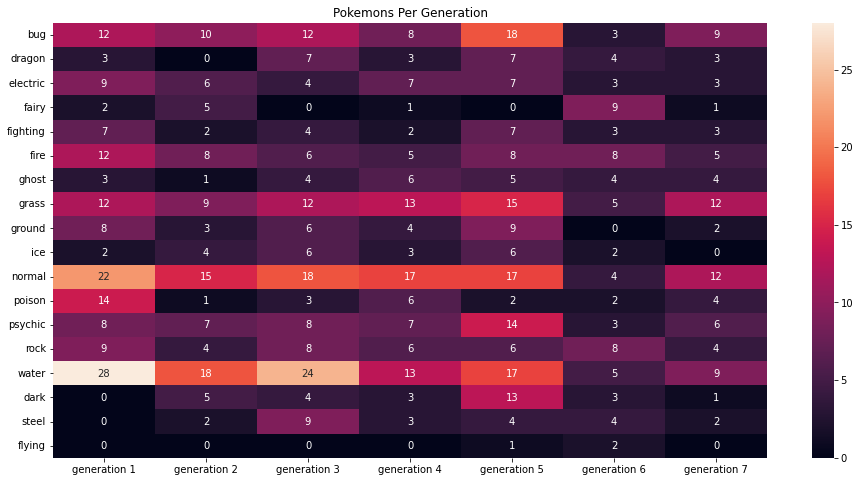

In [105]:
fig,axes = plt.subplots(figsize=(16,8))
sns.heatmap(p_type_by_generation,annot=True).set_title('Pokemons Per Generation')
plt.show()

We can see that no generation contains all the types of pokemon, like we do not have any Flying, Steel or Dark type pokemon in generation 1.

We can also see that only generation 5 & 6 have Flying type pokemons.

And we have:

• Most number of pokemons in Generation 1, 2 & 3 of Water Type.  
• Most number of pokemons in Generation 4 of Normal Type.  
• Most number of pokemons in Generation 5 of Bug Type.  
• Most number of pokemons in Generation 6 of Fairy Type.  
• Most number of pokemons in Generation 7 of Grass & Normal Type.  


(4) Which type has the easiest pokemon to catch?

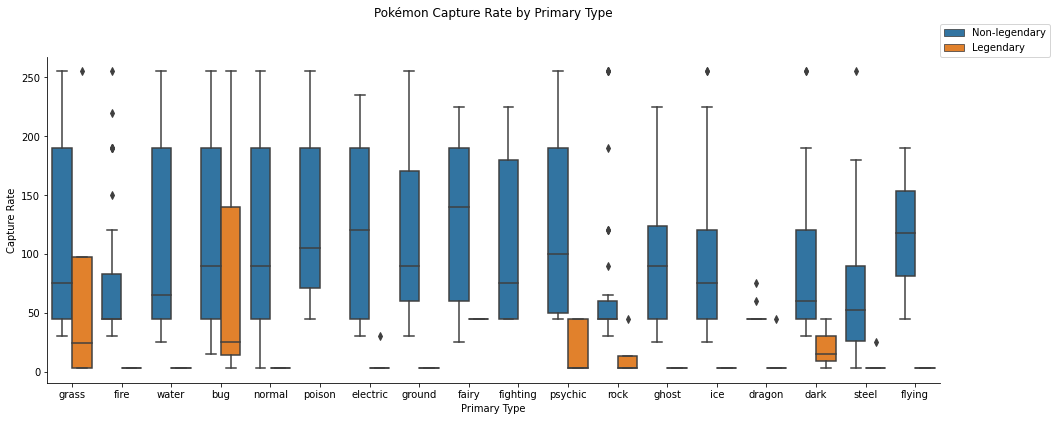

In [106]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(x='primary_type',y='capture_rate', hue='is_legendary', data = data)

ax.set_xlabel(xlabel='Primary Type')
ax.set_ylabel(ylabel='Capture Rate')
ax.set_title('Pokémon Capture Rate by Primary Type', pad=40)

sns.despine(top=True, right=True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Non-legendary', 'Legendary'], loc=(1,1))

• The easiest pokemon to capture is from the "Fairy Type" whereas the hardest to capture is "Dragon Type".  
• Also it's pretty hard to capture the "Fire Type" or "Rock Type" pokemons.  
• On the other hand, in Legendary pokemons, the easiest pokemon to capture will be from the "Grass or Bug" type.  

(5) What are the most wide spread types of pokemon in both Primary type and Secondary type?

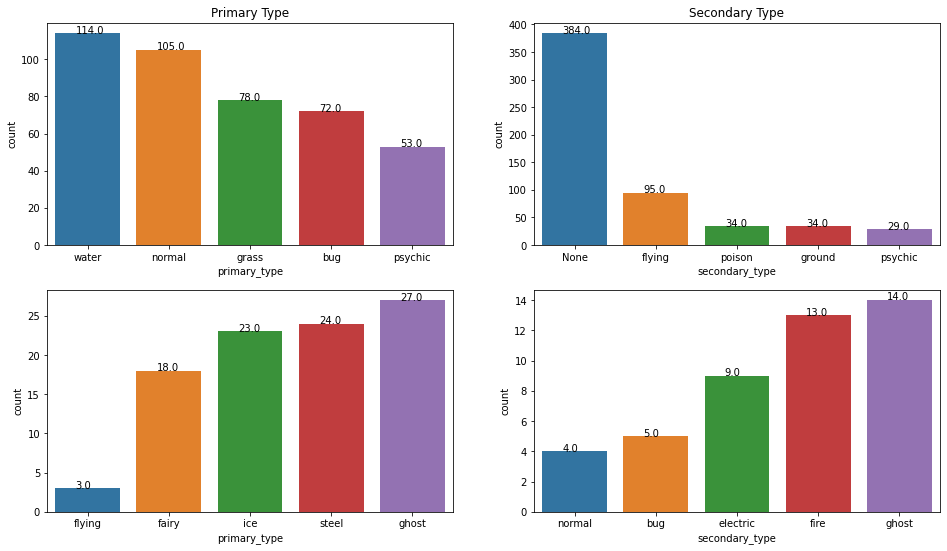

In [107]:
fig,axes = plt.subplots(2,2,figsize=(16,9))
ax = sns.countplot(x='primary_type',data=data,order=data['primary_type'].value_counts().iloc[:5].index, ax=axes[0,0])
ax.set_title('Primary Type')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax = sns.countplot(x='secondary_type',data=data,order=data['secondary_type'].value_counts().iloc[:5].index, ax=axes[0,1])
ax.set_title('Secondary Type')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax = sns.countplot(x='primary_type',data=data,order=data['primary_type'].value_counts(ascending=True).index[:5], ax=axes[1,0])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax = sns.countplot(x='secondary_type',data=data,order=data['secondary_type'].value_counts(ascending=True).index[:5], ax=axes[1,1])
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

The most wide spread type of pokemon in:  
• Primary Type => Water type pokemons  
• Secondary Type => Flying type pokemons (as this is secondary type so most of the pokemon has no secondary type)  

The least spread type of pokemon in:  
• Primary Type => Flying type pokemons  
• Secondary Type => Normal type pokemons  

Note that while there are most number of pokemons with Flying type in thier secondary type yet the flying type has the least number in primary type.  

(6) How does height and weight of a Pokemon correlate with its various base stats?

<AxesSubplot:xlabel='base_total', ylabel='height_m'>

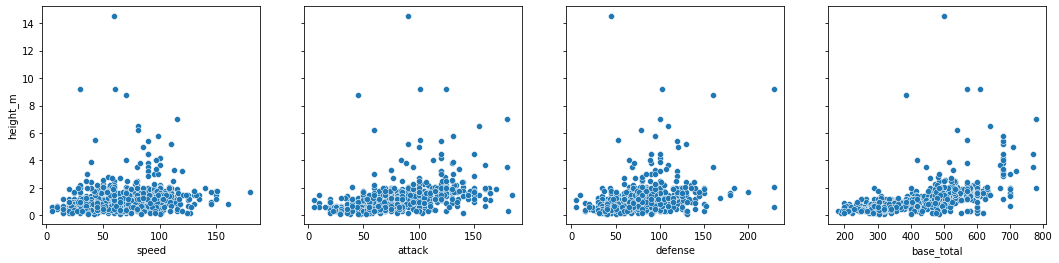

In [108]:
f, axes = plt.subplots(1,4,figsize=(18,4),sharey=True)

sns.scatterplot(x=data['speed'], y=data['height_m'],ax=axes[0])
sns.scatterplot(x=data['attack'], y=data['height_m'],ax=axes[1])
sns.scatterplot(x=data['defense'], y=data['height_m'],ax=axes[2])
sns.scatterplot(x=data['base_total'], y=data['height_m'],ax=axes[3])

• We can see that height and speed both are moderately related, the pokemons with small height are faster and those with large height value are slow. But in some cases, we can see that there are some pokemons with small height and are very slow too but apart from them most of the pokemons have moderate speed but small height.

• Same in the case with Height v/s Attack, here most of the pokemons with small height have high attack power and faster in speed too.

• Height and defense are moderately related as apart from some cases most of the pokemons possess small height and medium defense power.

• Though in base total we can see that there are some pokemons with moderate height but with high base total.

So a pokemon having a large height value have its own perks but most of the pokemons have small height and yet they are leading in their base stats which are necessary for them.

<AxesSubplot:xlabel='base_total', ylabel='weight_kg'>

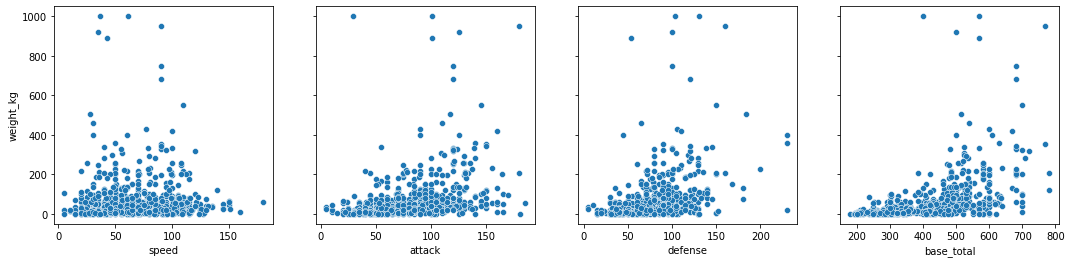

In [109]:
f, axes = plt.subplots(1,4,figsize=(18,4),sharey=True)
sns.scatterplot(x=data['speed'], y=data['weight_kg'],ax=axes[0])
sns.scatterplot(x=data['attack'], y=data['weight_kg'],ax=axes[1])
sns.scatterplot(x=data['defense'], y=data['weight_kg'],ax=axes[2])
sns.scatterplot(x=data['base_total'], y=data['weight_kg'],ax=axes[3])

• Pokemons with high weight are slower and those with low weight are faster, though there are some 4-5 cases where pokemon having high weight have more than normal speed too, most probably these will be flying type like Charizard.  

• In terms of attack heavy weight is not a very good factor as most of the pokemons having lightweight are good in attack. Yet few of them are heavyweight and have good attack power too. Probably their weight helps them in attacking their opponent.  

• In defense having a moderate weight is helpful to some pokemons as it helps them increase their defence strength by resisting more of those attacks.  

• Weighting nearly 100-200kgs can give a pokemon a good base total which indeed signifies its strength. 

So having heavy weight can help a pokemon in it's defence and somewhat in attack too. But most of the pokemons with 100-200 kg weight are leading their all stats against the rest.

(7) Which type is the most likely to be a legendary Pokemon?

In [110]:
legend = data[data['is_legendary']==1][['name','type','primary_type','secondary_type']]
legend.head()

,name,type,primary_type,secondary_type
143,Articuno,ice_flying,ice,flying
144,Zapdos,electric_flying,electric,flying
145,Moltres,fire_flying,fire,flying
149,Mewtwo,psychic,psychic,None
150,Mew,psychic,psychic,None


As the "secondary type" and "type" columns both have None in their values so we will neglect them as in the "type" column i.e. combined column values with None will only signify Primary type and will be of less use incorrect analysis.

In [111]:
from collections import Counter

#for secondary
s = []
secondary = legend['secondary_type']
for i in secondary:
    if 'None' in i: 
        pass
    else:
        s.append(i)
count_s = Counter(s)        

# for combined
c=[]
combined = legend['type']
for i in combined:
    if 'None' in i: 
        pass
    else:
        c.append(i)
count_c = Counter(c)

count_s = sorted(count_s.items(), key=lambda x: x[1], reverse=True)
count_c = sorted(count_c.items(), key=lambda x: x[1], reverse=True)

In [112]:
# separating the key, values we got from Counter() of both count_c(combined) and count_s(secondary).
v_s,k_s=[],[]
v_c,k_c=[],[]
for i in count_s:
    k_s.append(i[0])
    v_s.append(i[1])
for i in count_c:
    k_c.append(i[0])
    v_c.append(i[1])

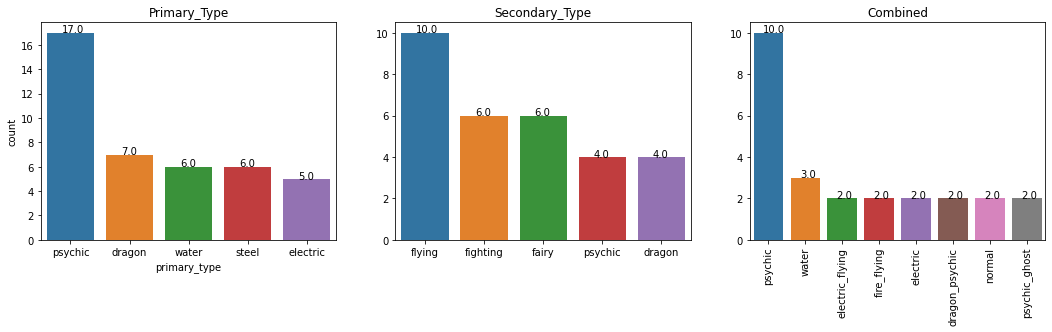

In [113]:
fig,axes = plt.subplots(1,3,figsize=(18,4))
ax = sns.countplot(x='primary_type',data=legend,order=legend['primary_type'].value_counts().iloc[:5].index, ax=axes[0])
ax.set_title('Primary_Type')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

ax = sns.barplot(x=k_s[:5],y=v_s[:5], ax=axes[1])
ax.set_title('Secondary_Type')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    
ax = sns.barplot(x=k_c[:8],y=v_c[:8], ax=axes[2])
ax.set_title('Combined')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

From the above visualizations we can gather few insights as:

• If a pokemon is of "Psychic" type in it's primary type, then there is very good chance of this pokemon being Legendary.  

• From the Secondary type perspective, if a pokemon have "Flying" as it's secondary type then possibility of this pokemon being Legendary is more.  

• If some pokemon has both primary and secondary type in it then these are the possible types of pokemon which can be considered as legendary:  

        • Electric and Flying Type
        • Fire and Flying Type
        • Dragon and Psychic Type
        • Psychic and Ghost Type
        • Bug and Fighting Type  
        
• One more thing to be noted is that, although "Psychic" is leading far better in Primary Type and "Flying" in Secondary Type yet combining both the types in one pokemon makes it less likely to be a legendary pokemon.

(8) Which type is the strongest overall? Which is the weakest?

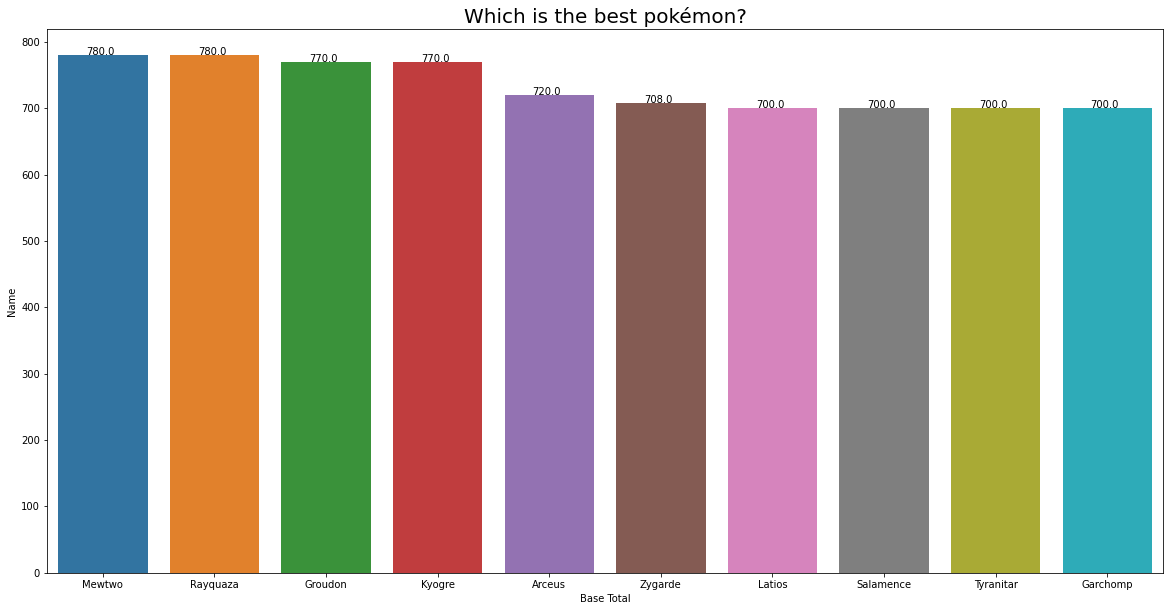

In [114]:
top10_pokemon_base_total = data.sort_values(by="base_total", ascending=False).reset_index()[:10]
plt.figure(figsize=(20,10))
ax = sns.barplot(x=top10_pokemon_base_total["name"], y=top10_pokemon_base_total["base_total"], orient='v')
ax.set_title("Which is the best pokémon?", size=20)
ax.set(xlabel="Base Total", ylabel="Name")
for p in ax.patches:
    ax.annotate('{:.1f}'.format( p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

• From above plot of comparison of all the base strengths we are getting two pokemons at same strength. i.e. "Mewtwo" and "Rayquaza".

• But taking in real terms the pokemon "Arceus", without a doubt, is the most powerful Legendary Pokémon. This Normal-type Mythical Pokémon is the creator of the universe and thus the closest that the Pokémon world has to a god. And according to our analysis in terms of base parameters, it's the 5th strongest Pokemon.

• On the other hand second strongest Pokemon is the Psychic-type Pokémon Mewtwo is a man-made, genetically enhanced version of the Mythical Pokémon Mew. Mewtwo is one of the most formidable Pokémon ever to exist. It can use the powers typical of its type, as well as telekinesis and telepathy.

To determine the strongest Pokemon, we summed up the base statistics for each species. While our metric approached Pokemon strength objectively as possible, in the end, it may not be meaningful to all players.

Therefore, the player's selection of moves, attack and defense points during the battle is ultimately a bigger factor in determining success than the strength of the Pokemon chosen. And hence the developers have made Pokemon a game that is more than simply optimizing statistics and strength, but is a tactical and personal experience.

Strongest Pokemon V/S God of Pokemons

We have a tie in the strongest Pokemons so we will be comparing both of the top player pokemons with the God of Pokemon: Arceus.  

We will be comparing them with their basic stats of attack, defense, etc and plotting a Radar Chart as this chart can be used to compare the properties of a single component or compare the properties of two or more variables together which will help us in comparing the two pokemons easily.  

In [115]:
attributes=['attack', 'sp_attack', 'defense', 'sp_defense', 'hp', 'speed']

mewtwo= top10_pokemon_base_total[top10_pokemon_base_total['name'] == 'Mewtwo'][attributes].values.tolist()[0]
rayquaza = top10_pokemon_base_total[top10_pokemon_base_total['name'] == 'Rayquaza'][attributes].values.tolist()[0]
# God of Pokemons: Arceus
Arceus = top10_pokemon_base_total[top10_pokemon_base_total['name'] == 'Arceus'][attributes].values.tolist()[0]

angles=np.linspace(0,2*np.pi,len(attributes), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))

attributes.append(attributes[0])
mewtwo.append(mewtwo[0])
rayquaza.append(rayquaza[0])
Arceus.append(Arceus[0])

Text(0.5, 1.0, 'Mewtwo & Rayquaza & God of Pokemons')

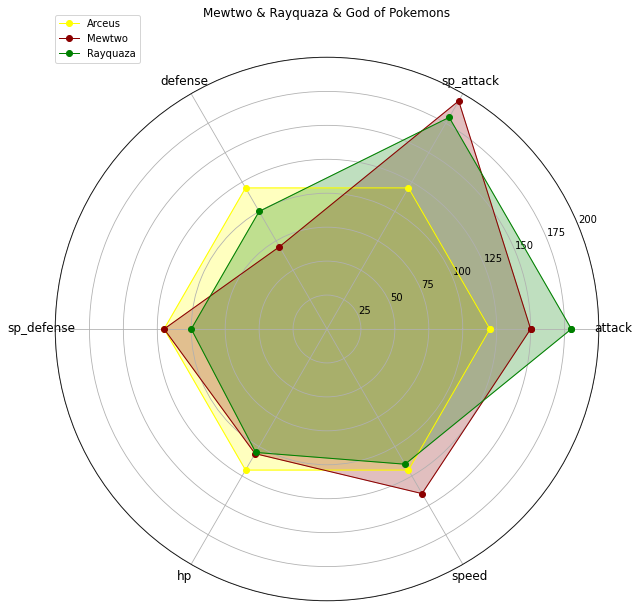

In [116]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111, polar=True)

#Arceus Plot
ax.plot(angles,Arceus, 'o-', color='yellow', linewidth=1, label='Rayquaza')
ax.fill(angles, Arceus, alpha=0.25, color='yellow')

# Mewtwo Plot
ax.plot(angles, mewtwo, 'o-', color='darkred', linewidth=1, label='Mewtwo')
ax.fill(angles, mewtwo, alpha=0.25, color='darkred')

# Rayquaza Plot
ax.plot(angles, rayquaza, 'o-', color='green', linewidth=1, label='Arceus')
ax.fill(angles, rayquaza, alpha=0.25, color='green')

ax.set_thetagrids(angles[:-1] * 180/np.pi, attributes[:-1], fontsize=12)
plt.grid(True)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Arceus', 'Mewtwo', 'Rayquaza'], loc=(0,0.99))

ax.set_title("Mewtwo & Rayquaza & God of Pokemons", pad=40)

From the above plot we can figure out that because of the special attacks of man-made pokemon Mewtwo it is having a higher value in the base total and came up to the top of the Strength chart that we plotted earlier.

Though Mewtwo is lacking a lot in defense but because of it's special attack and speed parameters it is leading the strenght race. On the other hand, Rayquaza is only leading in its attack value which is higher than the rest two, but Rayquaza is lacking in all other factors.

So on comparing both of the strongest pokemons: Mewtwo and Rayquaza. **Mewtwo** is a clear winner as it is leading in all other parameters and can be considered the **Strongest pokemon based on the stats**.

The God of pokemons Arceus has all balanced parameters with the same values for every parameter (approx 124) which also makes it a highly stable and balanced pokemon.


(9) Legendary or Not? Classifier

In [117]:
# For this we will be taking some selected features from our dataset.
classify_data= data[['attack','base_total','defense','hp','experience_growth','sp_attack','sp_defense','speed','total_abilities','is_legendary']]
classify_data.sample(5)

,attack,base_total,defense,hp,experience_growth,sp_attack,sp_defense,speed,total_abilities,is_legendary
183,50,420,80,100,800000,60,80,50,41,0
495,60,413,75,60,1059860,60,75,83,24,0
304,90,430,140,60,1250000,50,50,40,38,0
249,130,680,90,106,1250000,110,154,90,27,1
294,91,490,63,104,1059860,91,73,68,25,0


In [118]:
key_features = classify_data.drop("is_legendary",axis=1)
target = classify_data["is_legendary"]

# Spliting the dataset into test train set.
X_train,X_test,Y_train,Y_test = train_test_split(key_features,target,test_size=0.20, random_state=0)

In [119]:
Gnb = GaussianNB()
Gnb.fit(X_train,Y_train)

Y_pred_Gnb = Gnb.predict(X_test)
score_Gnb = round(accuracy_score(Y_pred_Gnb,Y_test)*100,2)
print("The accuracy score Gnb achieved is: "+str(score_Gnb)+" %")

The accuracy score Gnb achieved is: 91.93 %


In [120]:
Knn = KNeighborsClassifier()
Knn.fit(X_train, Y_train)

Y_pred_Knn = Knn.predict(X_test)
score_Knn = round(accuracy_score(Y_pred_Knn,Y_test)*100,2)
print("The accuracy score Knn achieved is: "+str(score_Knn)+" %")

The accuracy score Knn achieved is: 95.65 %


In [121]:
mlp = MLPClassifier()
mlp.fit(X_train, Y_train)

Y_pred_mlp = mlp.predict(X_test)
score_mlp = round(accuracy_score(Y_pred_mlp,Y_test)*100,2)
print("The accuracy score mlp achieved is: "+str(score_mlp)+" %")

The accuracy score mlp achieved is: 90.68 %


In [122]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

Y_pred_dtc = dtc.predict(X_test)
score_dtc = round(accuracy_score(Y_pred_dtc,Y_test)*100,2)
print("The accuracy score dtc achieved is: "+str(score_dtc)+" %")

The accuracy score dtc achieved is: 95.65 %


We can fill-in the values and then can test on some random values too, but for ease of understanding and for an example of the prediction I will be using some random names from the same dataset.

In [124]:
for i in ['Arceus','Pikachu','Latios','Zoroark', 'Mewtwo', 'Rayquaza']:
    example = data[data['name']==i][['attack','base_total','defense','hp','experience_growth','sp_attack','sp_defense','speed','total_abilities']]
    print("Pokemon:{} | Predicted:{} | Actual:{}".format(i,dtc.predict(example),data[data['name']==i]['is_legendary'].values))
    print('--------------------------------------------')

Pokemon:Arceus | Predicted:[1] | Actual:[1]
--------------------------------------------
Pokemon:Pikachu | Predicted:[0] | Actual:[0]
--------------------------------------------
Pokemon:Latios | Predicted:[1] | Actual:[1]
--------------------------------------------
Pokemon:Zoroark | Predicted:[0] | Actual:[0]
--------------------------------------------
Pokemon:Mewtwo | Predicted:[1] | Actual:[1]
--------------------------------------------
Pokemon:Rayquaza | Predicted:[1] | Actual:[1]
--------------------------------------------
